In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [10]:
train.shape

(614, 10)

In [3]:
train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [5]:
train['diabetes'].value_counts()

diabetes
0    400
1    214
Name: count, dtype: int64

### Distribution of the Target Column (diabetes)
##### The Taget column is the target variable (diabetes) where we asked to predict either 0, where the patient does not have diabetes or 1, where does have diabetes.

In [12]:
train.diabetes.value_counts()/len(train)*100

diabetes
0    65.14658
1    34.85342
Name: count, dtype: float64

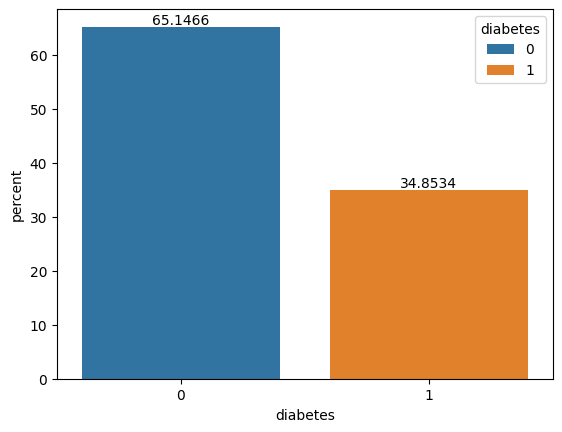

In [22]:
#Ploting the countpolot of the percentage of the Target Column
percent = sns.countplot(train, x="diabetes", hue="diabetes", stat="percent")
for i in percent.containers:
    percent.bar_label(i,)
plt.show()

##### 65.15%  of the patient does not have diabetes difficulties while 34.85% have diabetes . Therefore it's indicate that most of the patient does not have diabetes.

## Check for missing values in each of the column 

In [31]:
# Calculate missing values for each columns
missing_values =  train.isnull().sum() 

In [32]:
missing_values

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

##### There is no missing data from each column in the dataframe

## Column Type
##### Finding the type of data for in the dataframe

In [34]:
# Number of each type of column
train.dtypes.value_counts()

int64      8
float64    2
Name: count, dtype: int64

##### The number of numerical variable columns is 10 while the cetegorical variable columns is 0

## Checking for Anomalies
##### Finding if anomalies exist in the dataframe.

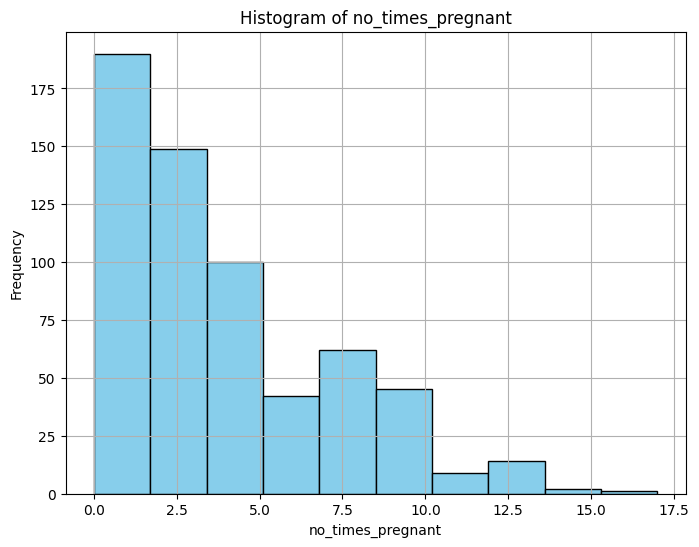

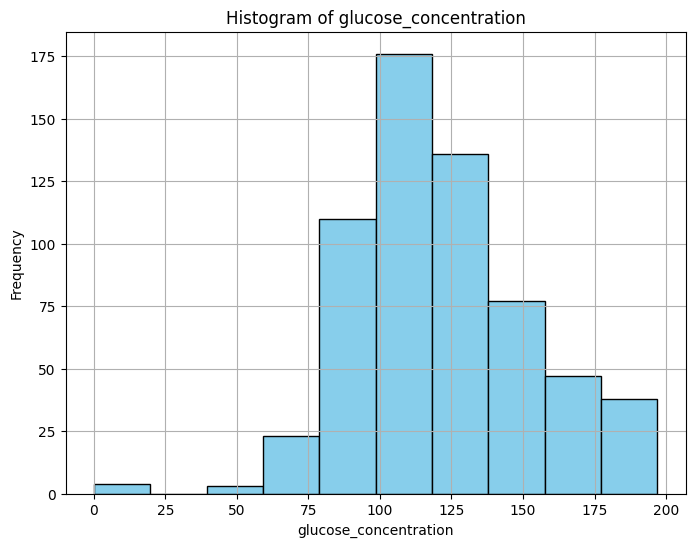

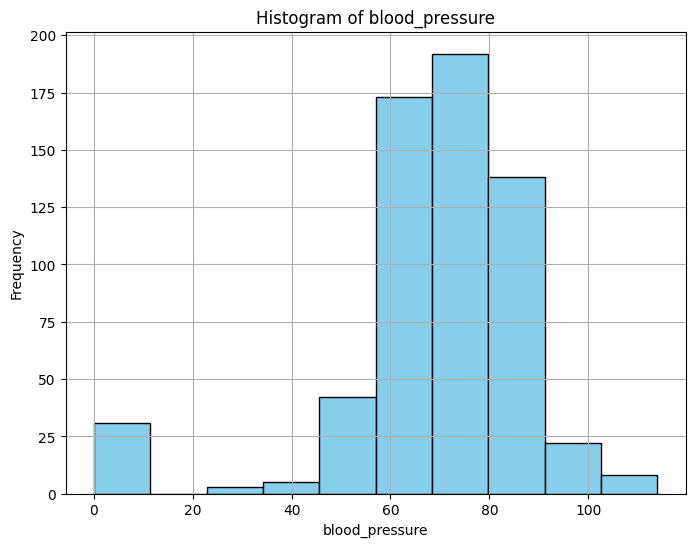

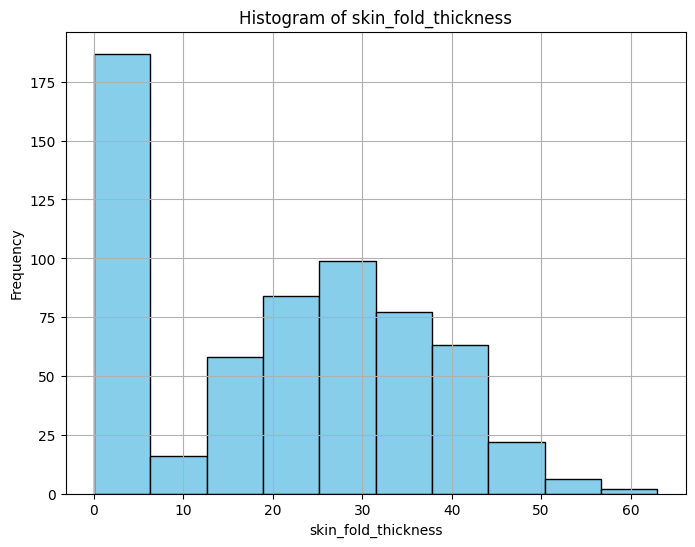

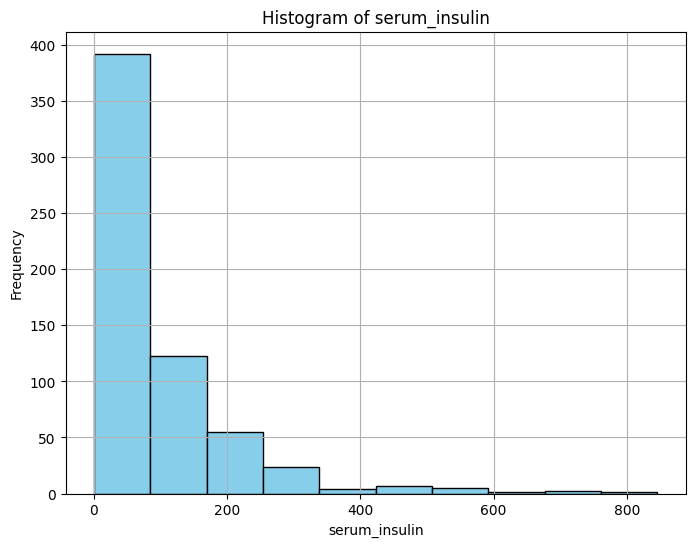

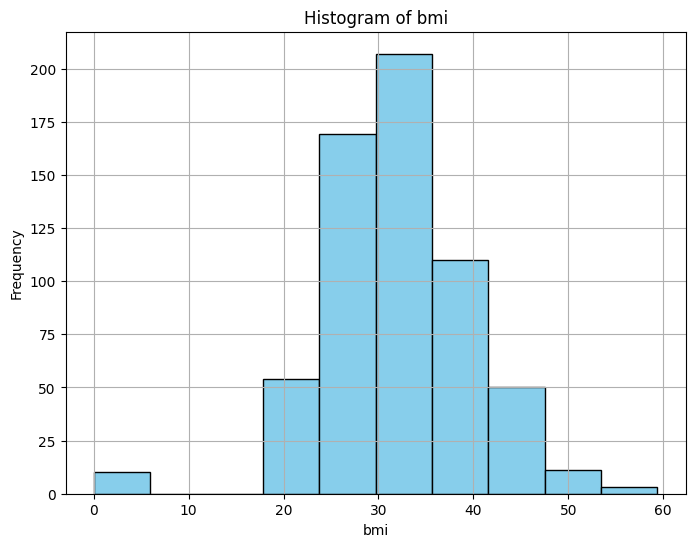

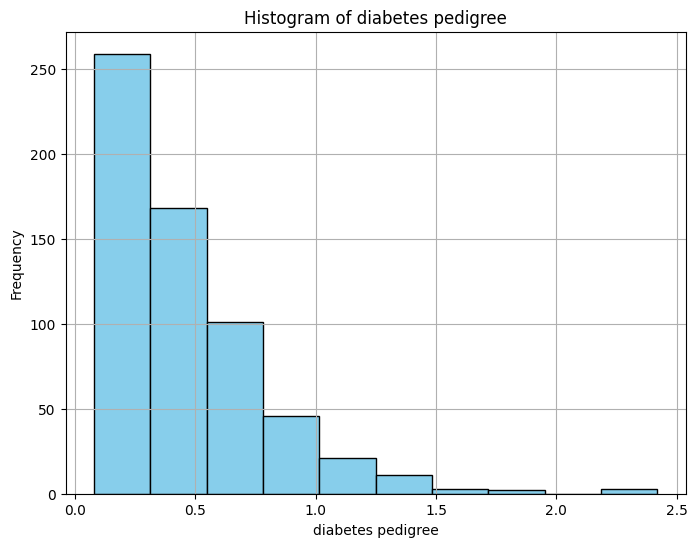

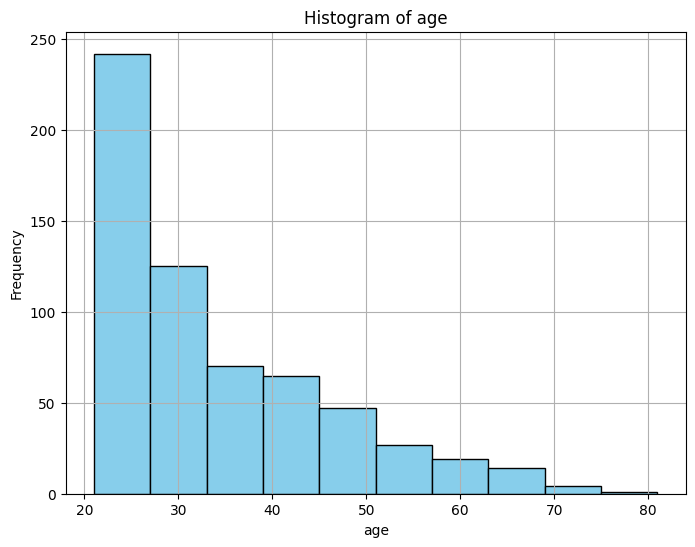

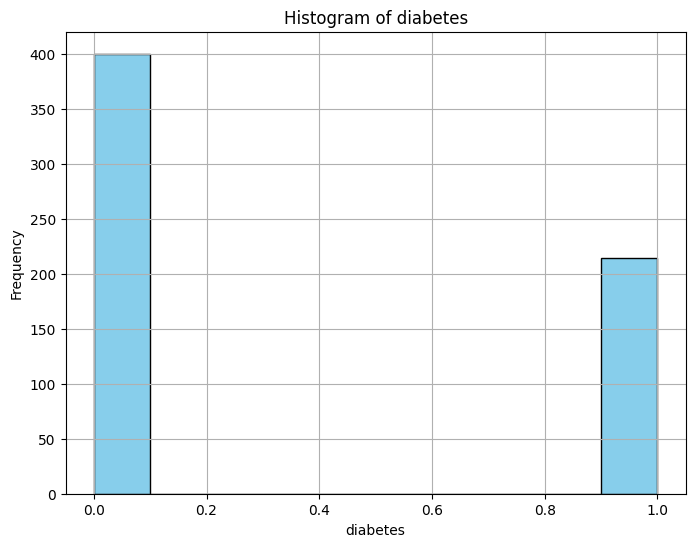

In [56]:
for column in train.columns:
    if column != 'p_id': 
        plt.figure(figsize=(8, 6))
        plt.hist(train[column], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
plt.show()

##### Based on the graph there is no anomelies in each of the columns

## Correlations
##### While the correlation coefficient is not the best method to represent a feature's "relevance," it does provide an indication of potential relationships within the data. Some general interpretations of the absolute value of the correlation coefficient include:

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”


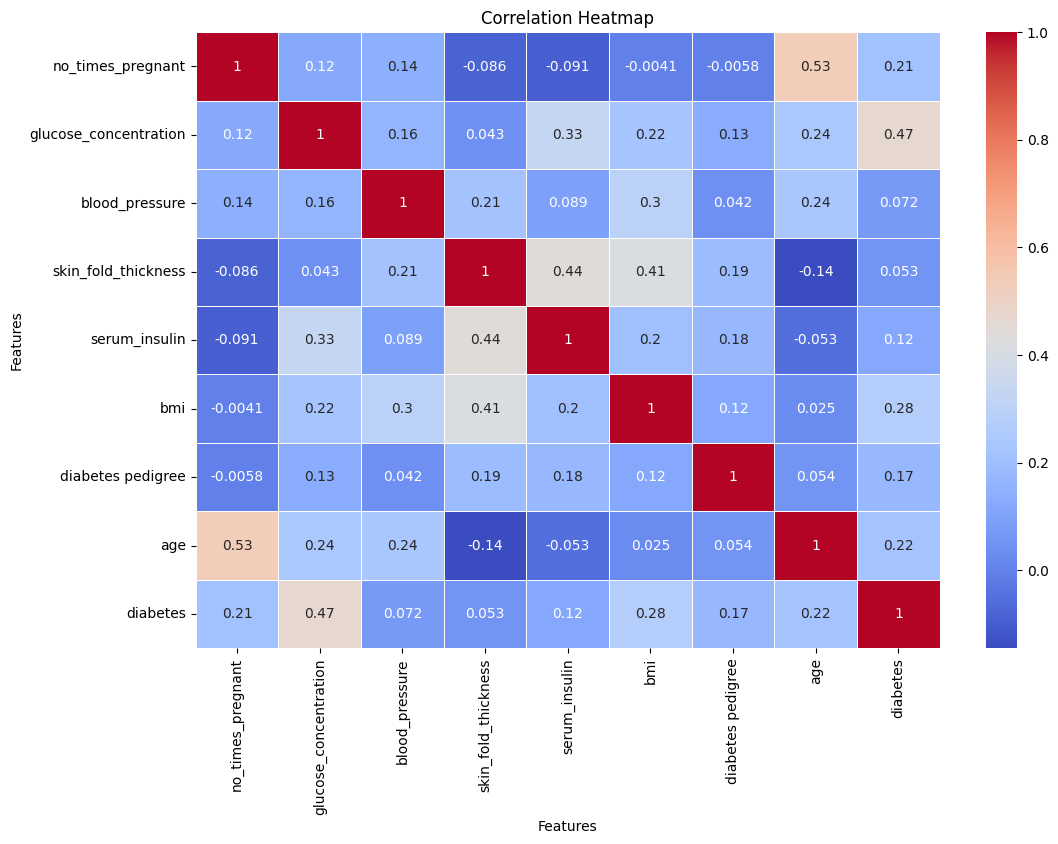

In [70]:
# Remove 'p_id' from the DataFrame
train_without_pid = train.drop(columns=['p_id'])

# Compute the correlation matrix 
correlation_matrix = train_without_pid.corr()


# Plotting the heatmap for the entire correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [79]:
# Extract the upper triangle of the correlation matrix using NumPy
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flatten the upper triangle matrix and sort values
sorted_correlations = upper_triangle.unstack().dropna().sort_values()

# Display the top minimum correlations (most negative)
top_min_correlations = sorted_correlations.head()
print("Top Minimum Correlations:")
print(top_min_correlations)

# Display the top maximum correlations (most positive)
top_max_correlations = sorted_correlations.tail()
print("\nTop Maximum Correlations:")
print(top_max_correlations)

Top Minimum Correlations:
age                  skin_fold_thickness   -0.144741
serum_insulin        no_times_pregnant     -0.091123
skin_fold_thickness  no_times_pregnant     -0.085653
age                  serum_insulin         -0.052863
diabetes pedigree    no_times_pregnant     -0.005811
dtype: float64

Top Maximum Correlations:
serum_insulin  glucose_concentration    0.330860
bmi            skin_fold_thickness      0.413288
serum_insulin  skin_fold_thickness      0.439886
diabetes       glucose_concentration    0.469336
age            no_times_pregnant        0.534231
dtype: float64


##### Based on the data the serum_insulin and glucose_concentration is the most positive correlation and age and skin_fold_thickness is the most negative correlation between the features.
##### Next we should calculate the correlation between all the features and the target.

Correlations with Diabetes:
 skin_fold_thickness      0.052695
blood_pressure           0.072003
serum_insulin            0.116562
diabetes pedigree        0.173301
no_times_pregnant        0.209196
age                      0.221736
bmi                      0.275263
glucose_concentration    0.469336
diabetes                 1.000000
Name: diabetes, dtype: float64


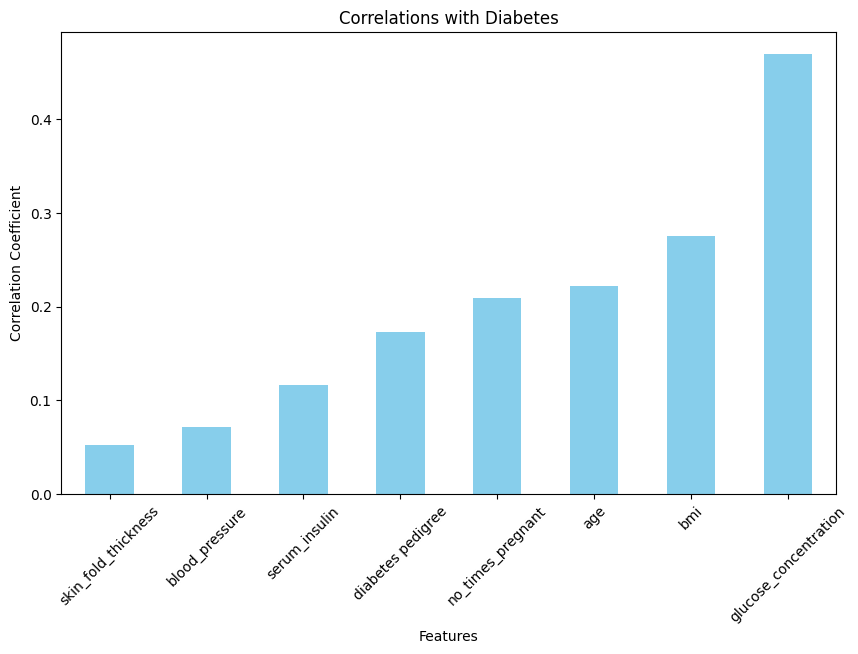

In [81]:
# Display correlations of all features with 'diabetes'
correlations_with_diabetes = correlation_matrix['diabetes'].sort_values()

# Print the correlations with 'diabetes'
print('Correlations with Diabetes:\n', correlations_with_diabetes)


# Optional: Bar plot for correlations with diabetes
plt.figure(figsize=(10, 6))
correlations_with_diabetes.drop('diabetes').plot(kind='bar', color='skyblue')
plt.title('Correlations with Diabetes')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

##### Based on the graph we can see that all of the features have a positve correlaiton between every features with glucose_concentrarion have the highest number of correlation which is 0.469336. This indicate that as the values of each features increase, the likelyness for the patient to have diabetes increases.

## Classification

In [5]:
# remove the p_id column since this column is not needed 
X=train.drop(['p_id', 'diabetes'], axis=1)

In [4]:
#Get the target columns (diabetes)
y=train.diabetes.values

In [6]:
X.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27


In [7]:
y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [434]:
X.columns

Index(['no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'],
      dtype='object')

In [435]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [436]:
len(X_train)

460

In [437]:
len(X_test)

154

In [438]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [439]:
X_train_sc

array([[ 1.54744892e+00,  6.26232189e-01,  1.24242175e+00, ...,
         1.18865797e-01,  9.18803817e-01,  9.83488556e-01],
       [ 9.43181939e-01,  6.88985006e-01, -4.02501314e-01, ...,
        -3.52811353e-01,  7.66110083e-01,  2.33395045e+00],
       [-1.17175249e+00,  1.66165367e+00,  4.68340306e-01, ...,
         1.78787725e+00,  2.29954502e+00,  2.08073885e+00],
       ...,
       [-1.17175249e+00,  6.57608598e-01, -3.30530672e+00, ...,
         1.29201153e+00, -7.99812881e-01, -3.66973342e-01],
       [ 1.24531543e+00, -1.29598209e-03, -3.30530672e+00, ...,
        -2.07679922e-01, -8.71286544e-01,  3.92661476e-01],
       [ 9.43181939e-01,  2.10092339e+00, -1.54605940e-02, ...,
         7.23580091e-01, -6.40621543e-01,  6.45873082e-01]])

In [440]:
X_test_sc

array([[-0.56748551, -0.62882415, -0.01546059, ...,  0.82033438,
        -0.41320534, -0.62018495],
       [ 0.33891496, -1.35048155,  0.66186067, ...,  0.49378866,
        -0.95900422,  0.13944987],
       [ 1.84958241,  0.87724346,  0.75862085, ...,  0.7114858 ,
         1.78623417,  1.48991177],
       ...,
       [ 0.03678147,  0.50072655,  0.08129959, ..., -0.06254849,
         2.37426749, -0.95780042],
       [-0.869619  , -1.28772873,  0.32320004, ...,  0.0342058 ,
        -0.17929154, -0.95780042],
       [ 1.24531543,  2.38331107,  0.37158013, ...,  0.69939152,
         0.49970825,  1.99633498]])

### kNN

In [441]:
# Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initiating the classifier
model = KNeighborsClassifier()

# Passing the data to classifier
model.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [442]:
y_pred = model.predict(X_test_sc)

In [443]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [444]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [445]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred)*100)

72.72727272727273


In [446]:
test = pd.read_csv('test.csv')
test.drop('p_id', axis=1, inplace=True)

X=train.drop(['p_id', 'diabetes'], axis=1)

data_sc = sc.transform(test)

single = model.predict(data_sc)

print(single)

[1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 0]


##### The result shows that kNN give a 72.72% of accuracy score

### Decision Tree Classifier

In [447]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt = DecisionTreeClassifier()

# Passing the data to classifier
model_dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [448]:
y_pred_dt = model_dt.predict(X_test_sc)

In [449]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_dt)*100)

70.12987012987013


##### The result shows that Decision Tree Classifiier give a 70.13% of accuracy score

### Random Forest Classifier

In [450]:
# Call the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf = RandomForestClassifier(n_estimators=100)

# Passing the data to classifier
model_rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [451]:
y_pred_rf = model_rf.predict(X_test_sc)

In [452]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_rf)*100)

76.62337662337663


In [453]:
test = pd.read_csv('test.csv')
test.drop('p_id', axis=1, inplace=True)

X=train.drop(['p_id', 'diabetes'], axis=1)

data_sc = sc.transform(test)

single = model_rf.predict(data_sc)

print(single)

[1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1]


##### The result shows that Random Forest Classifier give a 76.62% of accuracy score. Based on all of the results, it can be concluded that the Random Forest Classifier have the highest number of accuracy score. Therefore, it is advise to use the Random Forest Classifier for the method of classification. 